In [ ]:
# Non Negative Matrix Factorization - Question 1

(40, 10)
(40000, 1)
2.4685700205384476e-16


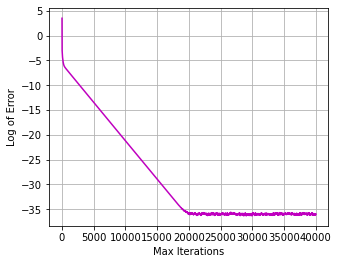

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Specify the rank
# Usually r is chosen to be smaller than nor m, so that Wand H are smaller than the original matrix V
# This results in a compressed version of the original data matrix
r = 6

# Construct a low rank matrix
#
Wtrue = np.random.rand(40,5)
Htrue = np.random.rand(5,10)
X0 = Wtrue @ Htrue
# print(X0)
print(X0.shape)

# Dimensions of data
#
m, n = X0.shape

# Normalise columnwise
#
X = np.zeros((m,n))

for i in range(n):
#     X[:,i] = X0[:,i] / np.max(X0[:,i]) # 
    X[:,i] = X0[:,i] / np.sum(X0[:,i])

# Initialize
#
W = np.random.rand(m,r);
H = np.random.rand(r,n);
MaxIter = 40000
f = np.zeros((MaxIter,1))

# Initial error
#
f[0] = np.linalg.norm(X - W @ H, ord='fro');


for iter in range(MaxIter-1):
    # Update W
    #
    
    numOfW = X @ H.T
    denOfW = W @ H @ H.T
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i, j] = W[i, j] * (numOfW[i, j]/denOfW[i, j])
        
    # Update H
    #

    numOfH = W.T @ X
    denOfH = W.T @ W @ H
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            H[i, j] = H[i, j] * (numOfH[i, j]/denOfH[i, j])
            
    # Measure Error   
    f[iter+1] = np.linalg.norm(X - W @ H, ord='fro')
    
print(f.shape)
#Plot the convergence for NMF
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='m')
ax.set_xlabel("Max Iterations")
ax.set_ylabel("Log of Error")
ax.grid(True)

# plt.savefig('whenRankIsChanged.png')
print(np.linalg.norm(X - W @ H, ord='fro'))

In [3]:
# Using sklearn 

from sklearn.decomposition import NMF

MaxIter = 40000

model = NMF(n_components=6, init='random', max_iter=MaxIter)
W = model.fit_transform(X)
print(W.shape)
H = model.components_
print(H.shape)

print(model.reconstruction_err_)


(40, 6)
(6, 10)
0.0001388116073014548


In [4]:
# NMF for equities.xlsx

import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the data
data = pd.read_excel('Equities.xlsx')
dropped_date = data.drop(columns = 'Name')
dropped_date.head()


,FTSE100,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AVIVA,BAE SYSTEMS,BARCLAYS,...,STANDARD LIFE ABERDEEN,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITED UTILITIES GROUP,VODAFONE GROUP,WHITBREAD,WOOD GROUP (JOHN),WPP,3I GROUP
0,5092.23,1492.0,2299.0,1170.0,103.1,1035,2743.5,322.0,253.8,142.26,...,195.28,29.00,371.55,2025.0,580.0,166.50,1445,526.5,601.0,204.3
1,5040.76,1495.0,2238.5,1183.0,101.0,1020,2731.5,315.3,253.5,139.02,...,194.77,28.71,370.25,2007.0,571.5,163.93,1429,507.5,590.0,202.0
2,5095.30,1521.0,2249.5,1212.0,100.6,1041,2822.0,318.0,258.1,135.10,...,198.64,28.90,377.70,2038.0,580.5,167.06,1454,518.5,578.5,203.4
3,5129.42,1535.0,2234.0,1206.0,99.4,1049,2832.5,318.8,258.8,134.36,...,197.93,29.10,377.20,2042.0,579.5,168.75,1445,542.5,580.0,200.7
4,5205.85,1353.0,2287.0,1203.0,101.0,1049,2873.5,327.4,266.9,138.19,...,203.64,29.52,377.30,2043.0,586.5,172.18,1441,554.5,623.0,207.6


In [5]:
# Splitting data into Test and Training data 
factorisingAndSelection_data, testing_data = train_test_split(dropped_date, test_size=0.5, shuffle=False)
m, n = factorisingAndSelection_data.shape
col_name = np.array(factorisingAndSelection_data.columns)
# print(col_name)
Xtrain_set = np.array(factorisingAndSelection_data)
print (m, n)
r = 10
print(type(Xtrain_set))


983 96
<class 'numpy.ndarray'>


[[1.36088936e-01 1.13834924e-01 8.70294436e-01 5.62314394e-01
  2.12340886e-02 7.10000619e-01 8.48439011e-01 7.82386340e-01
  1.43427358e-01 7.82005064e-01]
 [1.95747496e-01 6.85159380e-01 4.42367224e-01 5.81323990e-01
  3.43500123e-01 1.88742798e-01 1.28230568e-01 6.88822277e-01
  5.51622087e-01 8.81468329e-02]
 [9.87294972e-02 5.76188006e-01 7.40374113e-02 7.62990778e-01
  6.04828256e-01 5.23066582e-01 1.39881982e-01 6.14819416e-01
  7.80091422e-01 5.40185885e-02]
 [4.59988346e-01 2.97265907e-01 3.97136285e-01 3.27794567e-01
  7.89716009e-01 5.26397119e-01 8.93639373e-01 5.24312164e-01
  2.81976835e-01 7.79628203e-01]
 [1.27575834e-01 3.87964678e-01 4.28297400e-01 1.93747169e-01
  9.39439919e-01 3.32735325e-01 5.00617364e-01 9.54971454e-01
  2.95219450e-02 1.36146567e-01]
 [9.68888060e-01 6.75966513e-01 5.79065351e-01 9.63956651e-01
  1.36070306e-01 7.04228692e-01 9.54585958e-02 9.66541562e-01
  5.18801284e-01 6.67569059e-01]
 [8.27737904e-01 3.36993764e-01 8.98784210e-01 9.87199059e

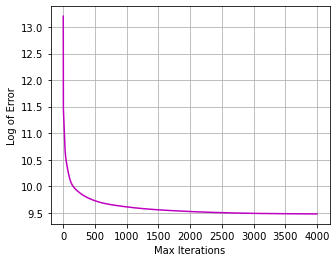

In [6]:
# Implementing NMF algorithm

# Initialize
#
np.set_printoptions(threshold=np.inf)
W = np.random.rand(m,r)
print(W)
H = np.random.rand(r,n)
MaxIter = 4000
f = np.zeros((MaxIter,1))

# Initial error
#
f[0] = np.linalg.norm(Xtrain_set - W @ H, ord='fro');

for iter in range(MaxIter-1):
    # Update W
    #
    
    numOfW = Xtrain_set @ H.T
    denOfW = W @ H @ H.T
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i, j] = W[i, j] * (numOfW[i, j]/denOfW[i, j])
        
    # Update H
    #

    numOfH = W.T @ Xtrain_set
    denOfH = W.T @ W @ H
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            H[i, j] = H[i, j] * (numOfH[i, j]/denOfH[i, j])
            
    # Measure Error   
    f[iter+1] = np.linalg.norm(Xtrain_set - W @ H, ord='fro')
    
# print(f.shape)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='m')
ax.set_xlabel("Max Iterations")
ax.set_ylabel("Log of Error")
ax.grid(True)

plt.savefig('whenRankIsChanged.png')
# print(np.linalg.norm(Xtrain_set - W @ H, ord='fro'))

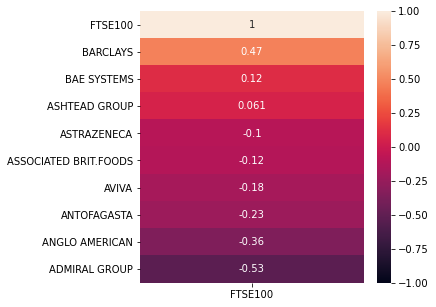

In [16]:
# Rank these factors by their correlation with the FTSE index and select the one that correlates most

import seaborn as sns

ftse100 = W[:,0]
# print(col_name[0:10])
W_pd = pd.DataFrame(W, columns = col_name[0:10])
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(W_pd.corr()[['FTSE100']].sort_values(by='FTSE100', ascending=False), vmin=-1, vmax=1, annot=True);
plt.savefig('correlationheatmap.png')


In [17]:
#Compare the cummulative returns you will get by investing in the FTSE and in the selected factor

MaxIter = 4000
test_sample_array = np.array(testing_data)

W = np.random.rand(m,r)
H = np.random.rand(r,n)

print(test_sample_array.shape)
for iter in range(MaxIter-1):
    # Update W
    #
    
    numOfW = test_sample_array @ H.T
    denOfW = W @ H @ H.T
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            W[i, j] = W[i, j] * (numOfW[i, j]/denOfW[i, j])
        
    # Update H
    #

    numOfH = W.T @ test_sample_array
    denOfH = W.T @ W @ H
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            H[i, j] = H[i, j] * (numOfH[i, j]/denOfH[i, j])


(983, 96)


FTSE100       -184.435363
BAE SYSTEMS     -0.368592
dtype: float64


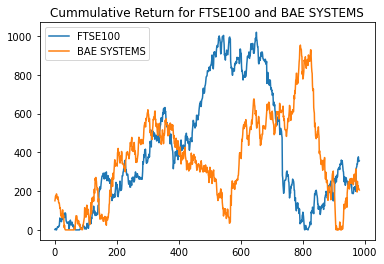

In [18]:

test_data_pd = pd.DataFrame(W, columns = col_name[0:10])
test_sample = test_data_pd[['FTSE100', 'BAE SYSTEMS']]
cum_return = (test_sample.iloc[0] - test_sample.iloc[-1]) / test_sample.iloc[0] # calculate cumulative return
print(cum_return)

fig = test_sample.plot(title = 'Cummulative Return for FTSE100 and BAE SYSTEMS').get_figure()
fig.savefig('cummulativereturn.png')

FTSE100         0.099523
BAE SYSTEMS    26.414234
dtype: float64


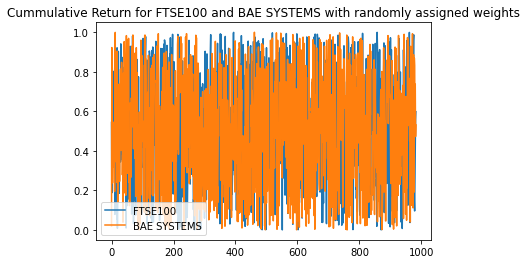

In [19]:
# Does the factor perform better than an equally weighted basket of the same number, r, of assets chosen at random?

W = np.random.rand(m,r)
H = np.random.rand(r,n)

rand_test_data_pd = pd.DataFrame(W, columns = col_name[0:10])
rand_test_sample = rand_test_data_pd[['FTSE100', 'BAE SYSTEMS']]
cum_return = (rand_test_sample.iloc[-1] - rand_test_sample.iloc[0]) / rand_test_sample.iloc[0]
print(cum_return)

fig = rand_test_sample.plot(title = 'Cummulative Return for FTSE100 and BAE SYSTEMS with randomly assigned weights').get_figure()
fig.savefig('RandomlyAssignedWeights.png')

In [ ]:
# K-Means Alogorithm - Question 2

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix
import random
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import datasets

In [21]:
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)
def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m))))
    den = 2 * np.pi * dC
    return num/den

def twoDGaussianPlot(nx,ny,m,C):
    x = np.linspace(-10,10,nx)
    y = np.linspace(-10,10,ny)
    X,Y = np.meshgrid(x,y,indexing="ij")
    Z = np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec,m,C)
    return X,Y,Z

In [22]:
# Define three means
#
Means = np.array([[0, 3], [3, 0], [4,4]])

# Define three covariance matrices ensuring they are positive definite
# 3 2D matrix having shape (2,2)
CovMatrices = np.zeros((3,2,2)) 
for j in range(3):
    # make_spd_matrix: Generate a random symmetric, positive-definite matrix
    CovMatrices[j,:,:] = make_spd_matrix(2) 
    
# Priors
#
w = np.random.rand(3) #Random values in a given shape
w = w / np.sum(w)

# How many data in each component (1000 in total)
#
nData = np.floor(w * 1000).astype(int)

# Draw samples from each component
#
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])

# Append into an array for the data we need
#
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)
# print(X)

In [23]:
# Distribute data around 3 centroids
centroids = {}
for i in range(3):
    centroids[i] = X[i]
# print(centroids)

In [24]:
#Calculate the clusters

clusters = {}

for i in range(3):
    clusters[i] = [] # Creating an empty array of clusters in range of 3

for data in X:
    dist = []
    for j in range(3):
        dist.append(np.linalg.norm(data - Means[j])) # find the distance from the mean and the point of data from dataset     
    clusters[dist.index(min(dist))].append(data)  # take the data that has minimum distance from the mean

# print(clusters)

In [26]:
# Recalculate the centroids
for i in range(3):
    centroids[i] = np.average(clusters[i], axis = 0)
print(centroids)

{0: array([-0.24093808,  2.84839045]), 1: array([3.02656899, 0.01785425]), 2: array([4.0008177 , 4.02233856])}


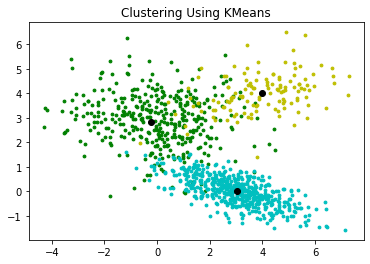

In [27]:
# Plot the clusters and centroids
plt.scatter(X0[:,0], X0[:,1], s= 8, c='g')
plt.scatter(X1[:,0], X1[:,1], s= 8, c='c')
plt.scatter(X2[:,0], X2[:,1], s= 8, c='y')
for i in centroids:
    centroidArray = np.array(centroids[i])
    plt.scatter(centroidArray[0], centroidArray[1], c='black')
plt.title('Clustering Using KMeans')

plt.savefig('kmeans.png')

In [28]:
clusters = {}

for i in range(3):
    clusters[i] = [] # Creating an empty array of clusters in range of 3

for data in X:
    dist = []
    for j in range(3):
        dist.append(np.linalg.norm(data - Means[j])) # find the distance from the mean and the point of data from dataset     
    clusters[dist.index(min(dist))].append(data)  # take the data that has minimum distance from the mean

for i in range(3):
    centroids[i] = np.average(clusters[i], axis = 0)

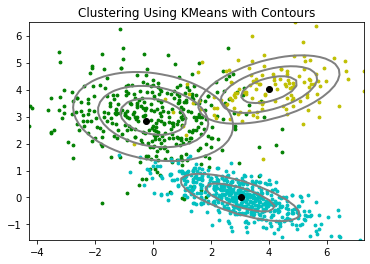

In [29]:
# Plot the clusters and centroids with contour
plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))

plt.scatter(X0[:,0], X0[:,1], s= 8, c='g')
plt.scatter(X1[:,0], X1[:,1], s= 8, c='c')
plt.scatter(X2[:,0], X2[:,1], s= 8, c='y')
for i in centroids:
    centroidArray = np.array(centroids[i])
    plt.scatter(centroidArray[0], centroidArray[1], c='black')
    
for i in range(3):
    Xp,Yp,Zp = twoDGaussianPlot(100,100,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3, colors=['grey', 'grey', 'grey'], linewidths=[2,2,2])
plt.title('Clustering Using KMeans with Contours')

plt.savefig('kmeansWithContourPlot.png')

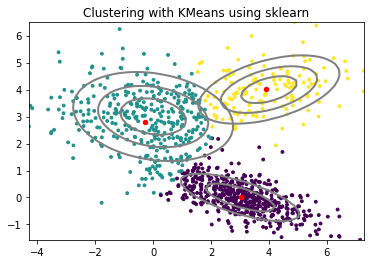

In [30]:
# KMeans using sklearn

kmeans = KMeans(n_clusters=3)
predictedClusters = kmeans.fit_predict(X) # Compute cluster centers and predict cluster index for each sample.

plt.xlim(min(X[:,0]), max(X[:,0]))
plt.ylim(min(X[:,1]), max(X[:,1]))

# Plot the cluster
plt.scatter(X[:,0], X[:,1], c=predictedClusters, s= 8)

#Computer centroid
centersFromSklearn = kmeans.cluster_centers_

#Plot cluster centers
plt.scatter(centersFromSklearn[:, 0], centersFromSklearn[:, 1], c='red', s=20);

#Plot contours for the clusters
for i in range(3):
    Xp,Yp,Zp = twoDGaussianPlot(100,100,Means[i],CovMatrices[i])
    plt.contour(Xp,Yp,Zp,3, colors=['grey', 'grey', 'grey'], linewidths=[2,2,2])

plt.title('Clustering with KMeans using sklearn')

plt.savefig('kmeansUsingSKlearn.png')

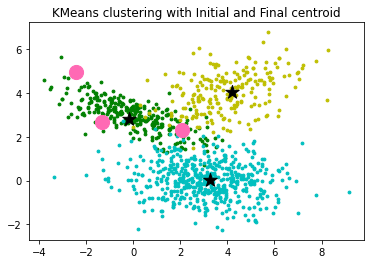

In [31]:
k = 3
diff_between_centroids = 100
# Define three means
#
Means = np.array([[0, 3], [3, 0], [4,4]])

# Define three covariance matrices ensuring they are positive definite
# 3 2D matrix having shape (2,2)
CovMatrices = np.zeros((3,2,2)) 
for j in range(k):
    # make_spd_matrix: Generate a random symmetric, positive-definite matrix
    CovMatrices[j,:,:] = make_spd_matrix(2) 
    
# Priors
#
w = np.random.rand(k) #Random values in a given shape
w = w / np.sum(w)

# How many data in each component (1000 in total)
#
nData = np.floor(w * 1000).astype(int)

# Draw samples from each component
#
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])

# Append into an array for the data we need
#
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)
initial_centroid = {}
for i in range(k):
    initial_centroid[i] = X[i]

prev_centroid = initial_centroid.copy()

while diff_between_centroids > 0.0:
    clusters = {}
    
#     print("\nInside while")
#     print("Previous Centroid: " , prev_centroid)
    for i in range(k):
        clusters[i] = [] # Creating an empty array of clusters in range of 3
    #Assigns cluster
    for data in X:
        dist = []
        for j in range(k):
            dist.append(np.linalg.norm(data - prev_centroid[j])) # find the distance from the mean and the point of data from dataset     
#         print(dist)
        clusters[dist.index(min(dist))].append(data)  # take the data that has minimum distance from the mean
    # Recalculate the centroids
    centroids = {}
    for i in range(k):
#         for j in range(len(X)):
#             if i == j:
#                 temp_centroids[j] = X[j]
#         print(temp_centroids)
        centroids[i] = np.average(clusters[i], axis = 0)
#     print(prev_centroid)
#     print("Current Centroids: ", centroids)

    diff_between_centroids = 0
#     #     print(len(initial_centroid))
    for i in range(len(prev_centroid)):
        diff_between_centroids = diff_between_centroids + np.linalg.norm(prev_centroid[i] - centroids[i])
#         print("Prvious centroid: ", prev_centroid[i])
#         print("Current Centroid: ",  centroids[i])
#         print("Difference: ", diff_between_centroids)
#     print("Difference: ", diff_between_centroids)
    prev_centroid = {}
    prev_centroid = centroids.copy()

plt.scatter(X0[:,0], X0[:,1], s= 8, c='g')
plt.scatter(X1[:,0], X1[:,1], s= 8, c='c')
plt.scatter(X2[:,0], X2[:,1], s= 8, c='y')
    
#Plot initial cluster centers
for i in initial_centroid:
    centroidArray = np.array(initial_centroid[i])
    plt.scatter(centroidArray[0], centroidArray[1], c='hotpink', s = 200)
    
for i in prev_centroid:
    centroidArray = np.array(prev_centroid[i])
    plt.scatter(centroidArray[0], centroidArray[1], c='black', marker ='*', s = 200)

plt.title('KMeans clustering with Initial and Final centroid')
plt.savefig('KMeansClusteringWithInitialandFinalCentroid.png')

In [32]:
# loading wine.data for K-Means
header_list = ["Alcohol", "Malic acid","Ash", "Alcalinity of ash", "Magnesium", "Total phenolsf", "Flavanoids","Nonflavanoid phenols",
              "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data = pd.read_csv("wine.data", header = None, error_bad_lines=False, sep = ",", names=header_list)

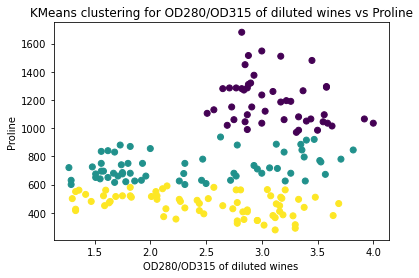

In [39]:
# Normal K-Means on two features to classify it into three wine

wine_samples = data.iloc[:, 2:]
wine_model = KMeans(n_clusters=3)
wine_labels = wine_model.fit_predict(wine_samples)

plt.xlabel("OD280/OD315 of diluted wines")
plt.ylabel("Proline")
plt.title("KMeans clustering for OD280/OD315 of diluted wines vs Proline")
plt.scatter(data['OD280/OD315 of diluted wines'], data['Proline'], c = wine_labels)
plt.savefig('KmeasnWithoutStandardizing.png')

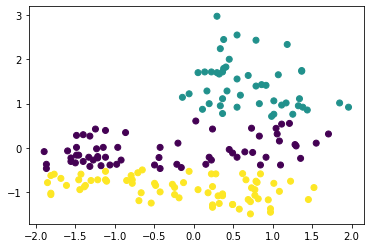

In [35]:
# Standardizing the dataset before K-Means is applied

from sklearn.preprocessing import StandardScaler

wine_scaler = StandardScaler()
wine_scaler.fit(wine_samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
wine_samples_scaled = wine_scaler.transform(wine_samples)

wine_samples_scaled = pd.DataFrame(wine_samples_scaled, columns=data.columns[2:])
wine_samples_scaled.head(2)

plt.scatter(wine_samples_scaled['OD280/OD315 of diluted wines'], wine_samples_scaled['Proline'], c = wine_labels)

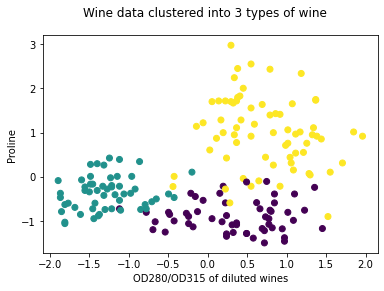

In [36]:
# Using pipeline to first standardize and then apply K-Means 
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(wine_samples_scaled)
wine_scaled_labels = pipeline.predict(wine_samples_scaled)

fig = plt.scatter(wine_samples_scaled['OD280/OD315 of diluted wines'], wine_samples_scaled['Proline'], c = wine_scaled_labels).get_figure()
fig.suptitle("Wine data clustered into 3 types of wine")
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Proline')
fig.savefig('winedataKmeans.png')